In [37]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
from scipy.optimize import minimize
from sympy import *
from random import choices

Задание 1
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))
a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [22]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

res = pairwise_distances  (raitings, metric="cosine")
print(res)
for i in range(0,10):
    ind = list(res[i]).index(min([x for x in res[i] if x != 0]))
    print(f"user {i+1} is similar to user {ind+1}")

[[0.         0.17397081 0.15078471 0.21659884 0.18082368 0.25881452
  0.27264172 0.19032478 0.08934018 0.13989224]
 [0.17397081 0.         0.18765675 0.15364663 0.12861948 0.17286893
  0.17370316 0.19973997 0.17473692 0.18031873]
 [0.15078471 0.18765675 0.         0.15330626 0.21605701 0.20902015
  0.32383777 0.23710448 0.17887923 0.08126949]
 [0.21659884 0.15364663 0.15330626 0.         0.30846591 0.21334208
  0.16725789 0.17065333 0.2229334  0.1411313 ]
 [0.18082368 0.12861948 0.21605701 0.30846591 0.         0.2235566
  0.21799532 0.18763131 0.12051523 0.15425211]
 [0.25881452 0.17286893 0.20902015 0.21334208 0.2235566  0.
  0.25988199 0.15548315 0.19377124 0.14485092]
 [0.27264172 0.17370316 0.32383777 0.16725789 0.21799532 0.25988199
  0.         0.17330826 0.18869956 0.20845282]
 [0.19032478 0.19973997 0.23710448 0.17065333 0.18763131 0.15548315
  0.17330826 0.         0.2018724  0.16317771]
 [0.08934018 0.17473692 0.17887923 0.2229334  0.12051523 0.19377124
  0.18869956 0.201872

b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [28]:
pca = PCA(n_components = 5)
pca.fit(raitings)
X= pca.transform(raitings)
X

array([[-5.30986101,  1.92919845, -4.93300027,  2.70188013,  5.50497886],
       [ 2.87763403,  2.71659559,  1.40592782,  7.26325751, -4.50322291],
       [-4.94010408, -6.68861167, -0.94550184,  3.61556661, -0.68969272],
       [ 5.14939908, -6.28027284, -4.65978558,  1.09024004, -1.01471112],
       [-1.37488691,  7.54357985,  4.00834369,  2.1284001 , -0.16324949],
       [ 2.65341956, -3.77075601,  8.58430748, -1.46628319,  1.67401769],
       [ 8.61573944,  3.78603335, -4.02721027, -4.37582577, -3.13880277],
       [ 5.39658258, -1.0170466 ,  1.01456742, -1.89512837,  6.54883538],
       [-5.7843488 ,  5.29857107, -1.48083611, -3.71295542,  0.21312695],
       [-7.2835739 , -3.51729118,  1.03318766, -5.34915166, -4.43127987]])


Задание 2
Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

In [37]:
x= symbols('x')
f = tan(sin(x)+cos(2*x+3))**2
f_pr1 = diff(f,x)
print("Первая производная", f_pr1)
f_pr1_val = f_pr1.evalf(subs={x: 1})
print("Первая производная для x=1", f_pr1_val)
#(tan(sin(x)+cos(2*x+3))**2)' = 2*tg(sin(x)+cos(2x+3)* (tg(six(x)+cos(2x+3))**2+1)*(cos(x) - 2sin(2x+3))

#1/cos^2 = tg2 + 1

Первая производная 2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))
Первая производная для x=1 55.3859176353379


Задание 3
Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.

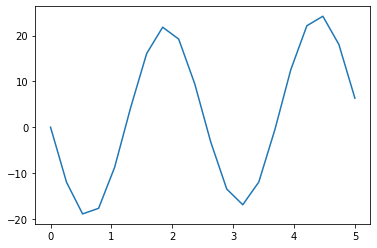

In [5]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])
plt.plot(x, fx)
plt.show()


In [28]:
res = minimize(error, [0,0], method='COBYLA', options={'tol':1e-6,'disp':True})
print(res)
print(f"Parameter a:{res.x[0]}, parameter b:{res.x[1]}")


     fun: 0.0010704233616394276
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 162
  status: 1
 success: True
       x: array([ 3.00000206, -2.5000014 ])
Parameter a:3.0000020623009775, parameter b:-2.500001397853547


Задание 4
Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

(array([  8.,  30.,  90., 173., 255., 221., 154.,  42.,  19.,   8.]),
 array([37.66 , 40.466, 43.272, 46.078, 48.884, 51.69 , 54.496, 57.302,
        60.108, 62.914, 65.72 ]),
 <a list of 10 Patch objects>)

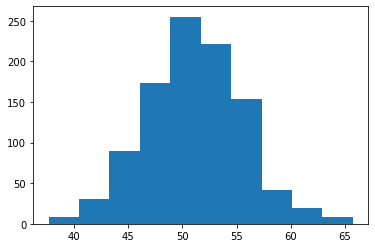

In [45]:

V = np.random.randint(low=1, high = 100, size =20)
n=50
means=[]
for _ in range(0,1000):
    means.append(np.mean(choices(V,k=n)))
plt.hist(means)


Задание 5
Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):


In [50]:
m = np.array([[1, 4],
              [1, 1]])
a, v = np.linalg.eig(m)
print("Собственные значения", a)
print("Собственные вектора", v)

# det(A-l*I) = l^2-2l-3=0 => l1 = -1, l2 = 3
# det(A-l*I) при l=-1 = det[[2,4],[1,2]] = 0 => матрица вырождена
# det(A-l*I) при l=3 = det[[-2,4],[1,-2]] = 0 => матрица вырождена
# решением (A − λI )v = 0 будет 
# для l=-1 y=-x/2  например (2,-1)
# для l=3 y=x/2 например (2,1)

Собственные значения [ 3. -1.]
Собственные вектора [[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]
